# Diffusion

In this notebook we will discuss briefly the basics of diffusion and its implementation in python. The main aim is to use the diffusion equation as a case study for numerical integration. 

## Theory

Diffusion is defined as a mechanism that spread molecules from a region of high concentration to a region of lower concentration in space. 

<a title="BruceBlaus [CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Blausen_0315_Diffusion.png"><img width="328" alt="Blausen 0315 Diffusion" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Blausen_0315_Diffusion.png/512px-Blausen_0315_Diffusion.png"></a>
$\hspace{7cm}$ **Fig. 1**: The movement of dye spreading in water is an example of diffusion.

The *Fig.* 1 shows how a drop of dye diffuses in water and occupy the available volume. Some other examples of diffusion are: a gas in the atmosphere, proteins moving in the extracellular environment, the ideas being diffused in society, etc. The concept of diffusion is widely applied across disciplines, from physics to economics.

The diffusion equation following the Fick's Law is given by 

$$ \partial_t c(x,y,z,t) =  D \nabla^2 c(x,y,z,t) $$

where $c(x,y,z,t)$ is a function defined in the space $\mathcal{R}^3$, $D$ is the diffusion coefficient or diffusivity that is related to how fast the field $c$ diffuses in space, $\nabla^2$ is the laplacian operator and $\partial_t$ the partial time derivative.

For a deeper discussion on Fick's Law and other types of diffusion, please take a look [here](https://en.wikipedia.org/wiki/Diffusion). 

## Numerical Methods

### Euler Method 

The Euler's method is based on the definition of derivatives, such as: 
$$ \frac{\mathrm{d} f(t) }{\mathrm{d}t} \approx \frac{f(t + \delta t) - f(t)}{ \delta t} \textrm{.}$$

Thus if we want to integrate the function $g(t)$, which is the derivative of the primitive function $f(t)$, we write
$$  \frac{f(t + \delta t) - f(t)}{ \delta t} = g(t) \textrm{,}$$ 
and isolate $f(t+\delta t)$
$$ f(t + \delta t) = f(t) + \delta t g(t) \textrm{.}$$

The integration is an iterative process where we use the previous value of the function $f(t)$ in order to calculate the next value $f(t+\delta t)$. It is common to find in the literature the Euler method written as 
$$ f_{n+1} = f_{n} + h g_{n} \textrm{,}$$
where $n$ is the $n$th-iteration. 


In [3]:
from ipywidgets import interactive, fixed
from euler import euler
w = interactive(euler,h=(0.01,0.5))
w

interactive(children=(FloatSlider(value=0.255, description='h', max=0.5, min=0.01), Output()), _dom_classes=('…

In the first graphic we can see the result of the integration compared to the exact solution. The Euler method is not perfect, but return quite similar quantitative results to the exact solution and conserves the qualitative behaviour. 

Change the value of $h$ using the slider and look the difference in the result. What do you observe?


### Discrete Laplace operator $\nabla^2$

We will use Finite Difference method with central differences in order to compute the laplacian. We will not show the derivation of the method here, but you can find further discussions in [DLO_1]. 

The definition of the discrete 2nd order Laplace operator using only first neighbours is

$$ \nabla^2 f(x_1,\cdots,x_n) \approx \sum_{i=1}^N \frac{\left(f(x_i+h_i) + f(x_i-h_i) - 2f(x_i) \right)}{h_i^{2}} \textrm{.} $$


In [2]:
def laplacian(f, i, l):
    h = 1.
    y = i
    yh = check_boundary(i+1, l)
    yl = check_boundary(i-1, l)
    return (f[yh]+f[yl]-2*f[y])/(h*h)

The precision can be improved adding more points to compute the laplacian. The following table shows the coefficients for several derivative orders and different precisions. Obtained from [DLO_2]. 

![table.png](https://gitlab.com/phydev/jupyter_notebooks/raw/master/table.png)

[DLO_1] __[Finite Difference - Wikipedia](https://en.wikipedia.org/wiki/Finite_difference)__

[DLO_2] __[Central Difference - Wikipedia](https://en.wikipedia.org/wiki/Finite_difference_coefficient)__

### Boundary Conditions

As in mathematics, when we integrate a function we should have in mind the adequate boundary conditions to be applied. One of the most basic and widely used boundary condition in statistical mechanics is the Periodic Boundary Condition (PBC). PBCs are specially usefull for statistical physics because it enables to mimic an "infinite" system.

<a title="I, Grimlock [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0/)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Limiteperiodicite.svg"><img width="328" alt="Limiteperiodicite" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Limiteperiodicite.svg/512px-Limiteperiodicite.svg.png"></a>
$\hspace{10cm}$ **Fig. 2**: Periodic Boundary Conditions in 2D.


The $Fig.$ 2 depicts how PBCs works: the box in the center is the real simulation box; the boxes around are the images; when a particle goes out of the main box, another particle from an image box enter the main simulation box (particle conservation); in practice the particle that leaves the box from one side re-enters at the opposite side.

There are other boundary conditions in the literature (open boundaries, zero flow, fixed, etc), but we will not discuss them here. The following function *check_boundary* can be used for periodic, Neumann and mirroring boundary conditions. 

In [8]:
def check_boundary(x, x0, x1, b0, b1):
    """ 
         This routine was adapted from c++,
         written originally in https://github.com/mesoscale/mmsp  
         
         x  (real) : is the coordinate your want to apply the boundary conditions
         x0 (real) : lower boundary
         x1 (real) : upper boundary
         b0 (string) : condition for the lower boundary
         b1 (string) : condition for the upper boundary
         
    """
    if(x<x0):
        if (b0 == 'Neumann' or b0 == 'Dirichlet'): 
            x = x0
        elif (b0 == 'periodic'):
            x = x1 - (x0 - x)
        elif (b0 == 'mirror'):
            x = 2 * x0 - x
    elif(x>=x1):
        if (b1 == 'Neumann' or b1 == 'Dirichlet'):
            x = (x1 - 1)
        elif (b1 == 'periodic'):
            x = x0 + (x - x1)
        elif (b1 == 'mirror'): 
            x = 2 * (x1 - 1) - x
    return x


## Implementation

Now we have all the main ingredients to integrate the diffusion equation, re-rewritting it using Finite Differences and the Euler method
$$ \frac{f(x,t+\delta t)-f(x,t) }{\delta t} = D \left[ f(x+h,t) + f(x-h,t) - 2f(x,t) \right] \textrm{,} $$ 

$$ f(x,t+\delta t) = f(x,t) + \delta t D \left[ f(x+h,t) + f(x-h,t) - 2f(x,t) \right] \textrm{.} $$ 


In the code diffusion.py we have each part of the code separated in different funtions which is a good practice of coding. The function *laplacian* calculates the laplacian, the function *integrate* uses Euler's method to integrate the diffusion equation in time. We have the *init* function to compute the gaussian distribution as the initial condition. 

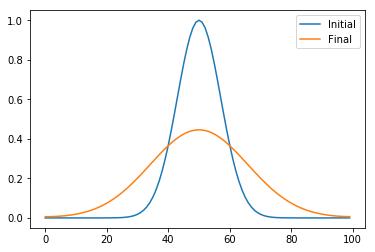

In [7]:
import diffusion as df
import matplotlib.pyplot as plt
l = 100 # spatial length
dt = 0.01 # time increment
final_time = 100
A = df.init(l) # initializing array with a Gaussian distribution

plt.plot(A,label='Initial') # plot initial condition

A = df.integrate(A, dt, final_time)

plt.plot(A, label='Final') # 
plt.legend()
plt.show()

Change the *final_time* and see what happens (test using a long period, e.g. 1000). What conclusions can you draw from the results above? Does it behave as expected for a diffusion system?